In [5]:
import sys
sys.path.append("../")
import os

from scipy import stats as st
from scipy import integrate
from matplotlib import pyplot as plt
import numpy as np
# from util.parameter import Parameter
from tqdm import tqdm_notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
import matplotlib 
matplotlib.style.use('classic')

from scipy.optimize import newton, fsolve

# from distribution import Pareto, Exp, Normal
# from util import exists, list_results, load, save

# from general_prior import *
import pickle as pkl
import pandas as pd
import seaborn as sns

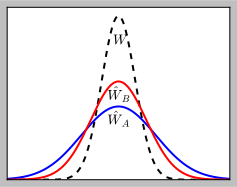

In [5]:
mq = 50
sq = 3

sa = 6
sb = 4

x = np.linspace(30, 70, 1000)

lw = 2
plt.figure(figsize=(4,3))
plt.plot(x, st.norm(mq, sq).pdf(x), color='k', ls='--' ,lw=lw)
plt.plot(x, st.norm(mq, np.sqrt(sa**2 + sq**2)).pdf(x), color='b',lw=lw)
plt.plot(x, st.norm(mq, np.sqrt(sb**2 + sq**2)).pdf(x), color='r',lw=lw)

plt.text(49, 0.11, "$W$", fontsize=14)
plt.text(48, 0.065, "$\hat W_{B}$", fontsize=14)
plt.text(48, 0.045, "$\hat W_{A}$", fontsize=14)
plt.xticks([])
plt.yticks([])
# plt.ylabel("$PDF$")
# plt.xlabel("$(Estimated)\ quality$")

plt.savefig("../fig/normal.pdf", bbox_inches="tight")

In [6]:
b=2

sa = 0.4
sb = 0.2

xs = np.linspace(0, 10, 200)

pa = []
pb = []
for x in tqdm_notebook(xs):
    pa.append(integrate.quad(func=lambda q: st.pareto(b).pdf(q) * st.norm(0, sa).pdf(x-q), a=1, b=50)[0])
    pb.append(integrate.quad(func=lambda q: st.pareto(b).pdf(q) * st.norm(0, sb).pdf(x-q), a=1, b=50)[0])

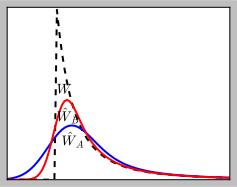

In [7]:
lw = 2
lim = 90
plt.figure(figsize=(4,3))
plt.plot(xs[:lim], st.pareto(b).pdf(xs[:lim]), color='k', ls='--' ,lw=lw)

plt.plot(xs[:lim], pa[:lim], color='b',lw=lw)
plt.plot(xs[:lim], pb[:lim], color='r',lw=lw)

plt.text(1.0, 1.0, "$W$", fontsize=14)
plt.text(1.0, 0.68, "$\hat W_{B}$", fontsize=14)
plt.text(1.1, 0.4, "$\hat W_{A}$", fontsize=14)
plt.xticks([])
plt.yticks([])
plt.savefig("../fig/pareto.pdf", bbox_inches="tight")

# Small $\alpha_1$

In [6]:
param = {
    'sigmag': [3, 0.2],
    'a2': 0.1,
    'pg': [0.4, 0.6]
}  
with open("./data/normal/{}.pkl".format(param), 'rb') as f:
    data = pkl.load(f)

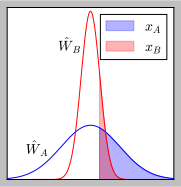

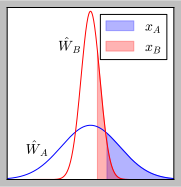

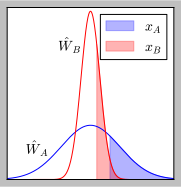

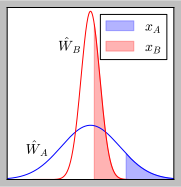

In [7]:
policies = ['sin', 'beta', 'dp', 'gr']

x = np.linspace(-8, 10, 1000)
lw=1

imax=10

for policy in policies:
    plt.figure(figsize=(3,3))
    pxa = st.norm(1, np.sqrt(1 + 3**2)).pdf(x)
    pxb = st.norm(1, np.sqrt(1 + 0.2**2)).pdf(x)
    plt.plot(x, pxa, color='b',lw=lw)
    plt.plot(x, pxb, color='r',lw=lw)
    # plt.text(-2.45, 0.25, "$\hat W_{B}$", fontsize=14)
    # plt.text(-5, 0.075, "$\hat W_{A}$", fontsize=14)""
    ia = np.argmin(np.abs(x - data[3][policy][imax][0]))
    ib = np.argmin(np.abs(x - data[3][policy][imax][1]))
    # plt.fill_between(x[ia:], pxa[ia:], color='b', alpha=0.3, label='$x_{A}^\mathrm{dp}$')
    # plt.fill_between(x[ib:], pxb[ib:], color='r', alpha=0.3, label='$x_{B}^\mathrm{dp}$')
    plt.fill_between(x[ia:], pxa[ia:], color='b', alpha=0.3, label='$x_{A}$')
    plt.fill_between(x[ib:], pxb[ib:], color='r', alpha=0.3, label='$x_{B}$')
    plt.legend(loc='upper right', fontsize=14)
    plt.xticks([])
    plt.yticks([])
    plt.text(-2.5, 0.3, "$\hat W_{B}$", fontsize=14)
    plt.text(-6, 0.06, "$\hat W_{A}$", fontsize=14)
    plt.savefig("../fig/{}-small-a1.pdf".format(policy), bbox_inches="tight")

# Large $\alpha_1$

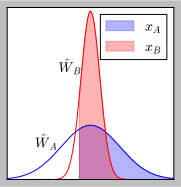

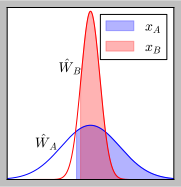

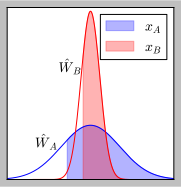

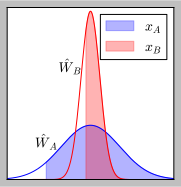

In [8]:
policies = ['sin', 'beta', 'dp', 'gr']

x = np.linspace(-8, 10, 1000)
lw=1

imax=45

for policy in policies:
    plt.figure(figsize=(3,3))
    pxa = st.norm(1, np.sqrt(1 + 3**2)).pdf(x)
    pxb = st.norm(1, np.sqrt(1 + 0.2**2)).pdf(x)
    plt.plot(x, pxa, color='b',lw=lw)
    plt.plot(x, pxb, color='r',lw=lw)
    plt.text(-2.45, 0.25, "$\hat W_{B}$", fontsize=14)
    plt.text(-5, 0.075, "$\hat W_{A}$", fontsize=14)
    ia = np.argmin(np.abs(x - data[3][policy][imax][0]))
    ib = np.argmin(np.abs(x - data[3][policy][imax][1]))
    # plt.fill_between(x[ia:], pxa[ia:], color='b', alpha=0.3, label='$x_{A}^\mathrm{dp}$')
    # plt.fill_between(x[ib:], pxb[ib:], color='r', alpha=0.3, label='$x_{B}^\mathrm{dp}$')
    plt.fill_between(x[ia:], pxa[ia:], color='b', alpha=0.3, label='$x_{A}$')
    plt.fill_between(x[ib:], pxb[ib:], color='r', alpha=0.3, label='$x_{B}$')
    plt.legend(loc='upper right', fontsize=14)
    plt.xticks([])
    plt.yticks([])
    plt.savefig("../fig/{}-small-a1.pdf".format(policy), bbox_inches="tight")